In [216]:
'''
grand average plots based on pile_all mat files generated by compare_constructs_GCaMP96uf
'''

from scipy.io import loadmat
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ap_idx = 0 # 0: 1AP, 1: 3AP, 2:10AP, 3:160AP

plot_subset_for_paper = 1 # 0: plot entire dataset, save as html. 1: plot subset, save as pdf for paper
html_write_dir = r'D:\site\ilyakolb.github.io\interactive_norm_plots.html'
pdf_dir = r"D:\ufgcamp_paper_data\culture-screen-figs/norm_plots.pdf"
plot_mat = loadmat(r'data/unnormPlots_singleWells_struct.mat')

subplot_titles = ['peak dF/F', 'SNR', 'half-rise time (ms)', 'full rise time (ms)', 'half-decay time (ms)']
df_cols = subplot_titles.copy()
df_cols.insert(0,'construct')

# labels and order of legend
if plot_subset_for_paper:
    hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s', 'GCaMP6s', 'jGCaMP7f', 'jGCaMP7s', 'XCaMP-Gf']# [h[0] for h in hits[0]]
else:
    hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s','jGCaMP8.712', 'GCaMP6s', 'GCaMP6f', 'jGCaMP7f', 'jGCaMP7s', 
                'jGCaMP7c', 'jGCaMP7b', 'XCaMP-Gf', 'XCaMP-G', 'XCaMP-Gf0']# [h[0] for h in hits[0]]

# magnify the kinetics of the following hits
magnify_hits_label = ['jGCaMP8f', 'jGCaMP8m', 'jGCaMP8s']

all_data = plot_mat['unnormPlots_singleWells_struct'][0]

all_constructs = [c[0] for c in all_plots['construct']]

# create dataframe
df = pd.DataFrame(columns=df_cols)

for construct_idx in range(len(all_constructs)):
    n_wells = len(all_data[construct_idx][1][ap_idx])
    n_cells = all_data[construct_idx][1].shape[1] # TEMPORARY BUGFIX
    
    dff = all_data[construct_idx][1][apidx]
    snr = all_data[construct_idx][2][apidx][:n_cells] # TEMPORARY SNR BUGFIX
    
    # get kinetics, convert to milliseconds
    halfrise = all_data[construct_idx][3][apidx]*1000
    fullrise = all_data[construct_idx][4][apidx]*1000
    halfdecay = all_data[construct_idx][5][apidx]*1000
    
    current_construct = [all_data[construct_idx][0][0]] * n_wells
    df_construct = pd.DataFrame(np.array([current_construct, dff, snr, halfrise, fullrise, halfdecay]).T, columns=df_cols)
    df = df.append(df_construct)

# cast data columns as floats
castdict = {x: 'float' for x in subplot_titles}
df = df.astype(castdict)
df.to_pickle('data/grand-avg-data.pkl')

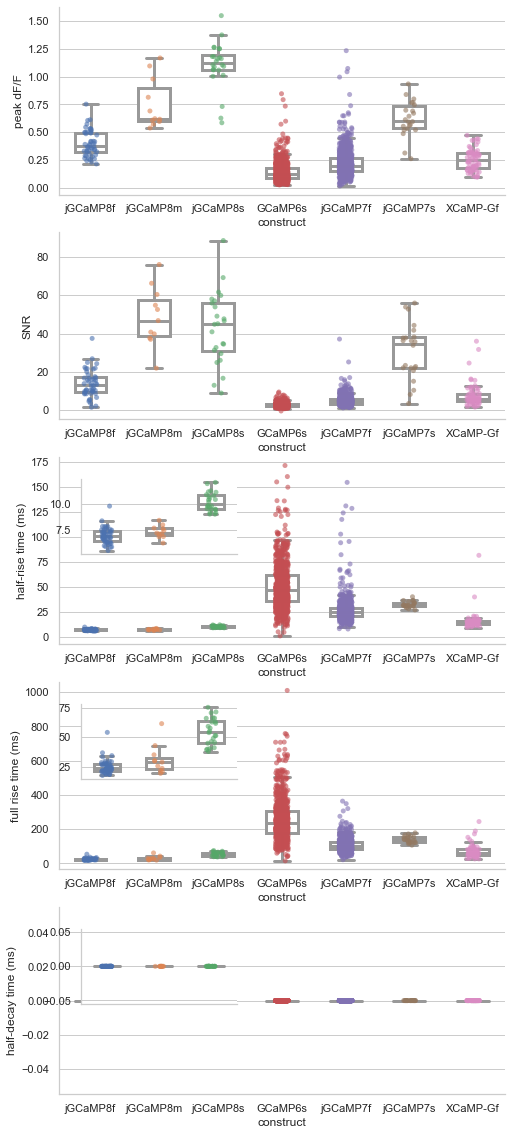

In [224]:

df_hits = df[df.construct.isin(hits_label)]
df_magnify_hits = df[df.construct.isin(magnify_hits_label)]

plt.figure(figsize=(8,20))
# ax = sns.violinplot(x="construct", y="half-rise time", data=df_hits, inner=None, scale='width')


sns.set_theme()
sns.set_style('whitegrid')


subplot_idx = 1
for var_to_plot in subplot_titles:
    plt.subplot(5,1,subplot_idx)
    subplot_idx +=1
    ax = sns.stripplot(x="construct",
                       y=var_to_plot, 
                       data=df_hits, 
                       order = hits_label, 
                       size=5,
                      alpha=0.6)
    ax = sns.boxplot(x="construct", 
                     y=var_to_plot, 
                     data=df_hits, 
                     order = hits_label, 
                     showfliers=False, 
                     color='white',
                     linewidth=3,
                     width=.5)
    #plt.xticks(rotation=-45)
    if 'time' in var_to_plot:
        # magnification inset
        ins_ax = inset_axes(ax, width="35%", height="40%", loc=2, borderpad=2)
        ins_ax = sns.stripplot(x="construct",
                            y=var_to_plot, 
                            data=df_magnify_hits, 
                            order = magnify_hits_label, 
                            size=5,
                            alpha=0.6)
        ins_ax = sns.boxplot(x="construct", 
                            y=var_to_plot, 
                            data=df_magnify_hits, 
                            order = magnify_hits_label, 
                            showfliers=False, 
                            color='white',
                            linewidth=3,
                            width=.5)
        ins_ax.set_xlabel(None)
        ins_ax.set_ylabel(None)
        ins_ax.set_xticklabels('')
    
sns.despine()


In [198]:
var_to_plot

'peak dF/F'

In [66]:
apidx = 0
all_data[0][2][apidx][:10]

array([4.47836906, 5.18420684, 6.13608123, 1.91777089, 3.26414371,
       1.86886469, 5.06210207, 5.05497099, 5.45017436, 2.62864391])